# House Prices: Advanced Regression Techniques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)

## Load train and test files

In [3]:
train = pd.read_csv("data/train.csv")
train.set_index('Id',inplace=True)
test = pd.read_csv("data/test.csv")
ID = test.Id.values.reshape([test.shape[0],1])
test.set_index('Id',inplace=True)

## Removing outliers

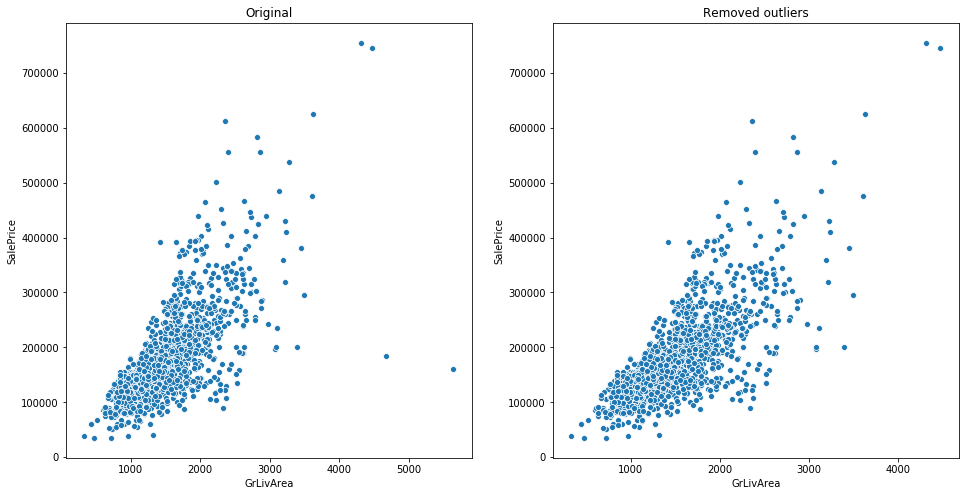

In [4]:
plt.subplot(121)
sns.scatterplot(train['GrLivArea'],train['SalePrice'])
plt.title("Original")
train.drop(train[train['GrLivArea'] >= 4600].index, inplace=True)
plt.subplot(122)
sns.scatterplot(train['GrLivArea'],train['SalePrice'])
plt.title("Removed outliers")
plt.show()

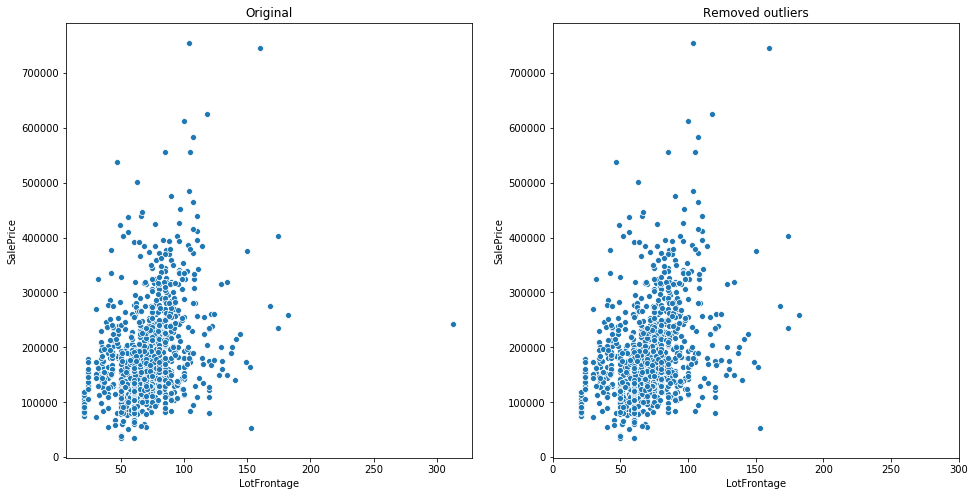

In [5]:
plt.subplot(121)
sns.scatterplot(train['LotFrontage'],train['SalePrice'])
plt.title("Original")
train.drop(train[train['LotFrontage'] >= 250].index, inplace=True)
plt.subplot(122)
sns.scatterplot(train['LotFrontage'],train['SalePrice'])
plt.title("Removed outliers")
plt.xlim(0,300)
plt.show()

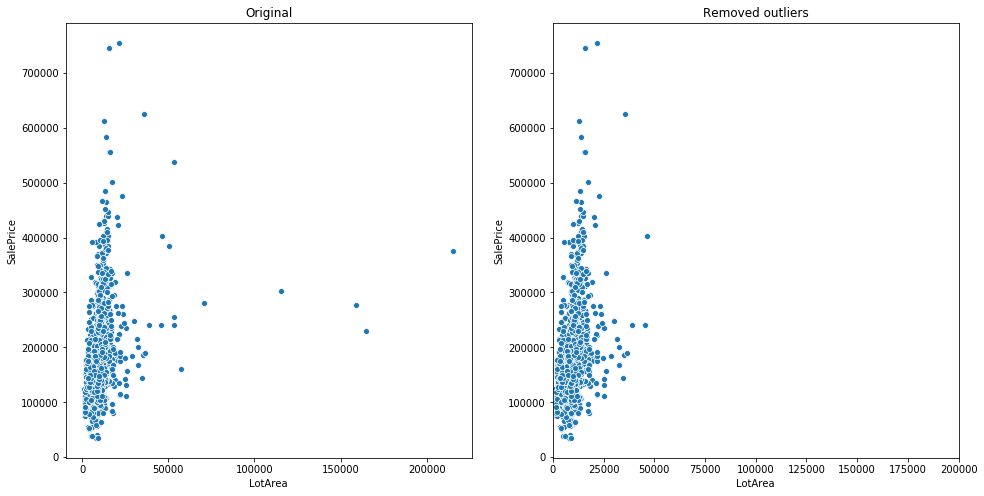

In [6]:
plt.subplot(121)
sns.scatterplot(train['LotArea'],train['SalePrice'])
plt.title("Original")
train.drop(train[train['LotArea'] >= 50000].index, inplace=True)
plt.subplot(122)
sns.scatterplot(train['LotArea'],train['SalePrice'])
plt.title("Removed outliers")
plt.xlim(0,200000)
plt.show()

## Dealing with positive skewed distribution of target variable

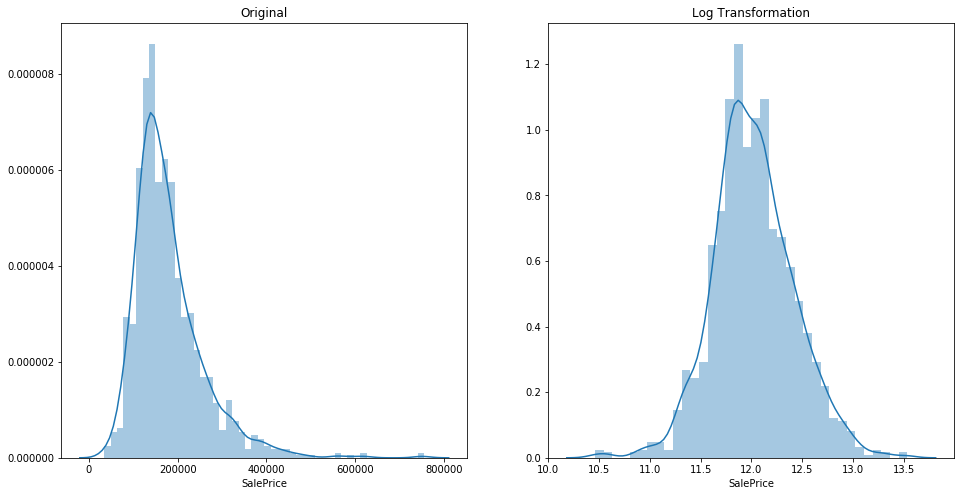

In [7]:
plt.subplot(121)
sns.distplot(train["SalePrice"])
plt.title("Original")
plt.subplot(122)
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train["SalePrice"])
plt.title("Log Transformation")
plt.show()

In [8]:
y = train["SalePrice"].values.reshape([train.shape[0],1])

## Data Preprocessing

In [9]:
data = pd.concat((train.loc[:,:'SaleCondition'],test.loc[:,:'SaleCondition']))

In [10]:
data.shape,train.shape,test.shape,y.shape

((2906, 79), (1447, 80), (1459, 79), (1447, 1))

### Missing Data

In [11]:
percentage_missing_data=(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)
percentage_missing_data.head(10)

PoolQC          99.690296
MiscFeature     96.455609
Alley           93.186511
Fence           80.350998
FireplaceQu     48.864418
LotFrontage     16.517550
GarageCond       5.471438
GarageQual       5.471438
GarageYrBlt      5.471438
GarageFinish     5.471438
dtype: float64

### Deleting Features having missing values greater than 80%

In [12]:
data.drop(['Alley','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)

In [13]:
data = data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                     "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                     })

### Seprating numeric and Categorical features

In [14]:
num_features_col = data.dtypes[data.dtypes != "object"].index
catg_features_col = data.dtypes[data.dtypes == "object"].index
print("No of numeric features : ",len(num_features_col))
print("No of categorical features : ",len(catg_features_col))

No of numeric features :  34
No of categorical features :  41


In [15]:
num_features_col,catg_features_col


(Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'YrSold'],
       dtype='object'),
 Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAi

### Handling missing values

In [16]:
data[num_features_col] = data[num_features_col].fillna(data[num_features_col].median())
data[catg_features_col] = data[catg_features_col].fillna(data[catg_features_col].median())
data=data.fillna(data.median())


### Distribution plots for numeric features 

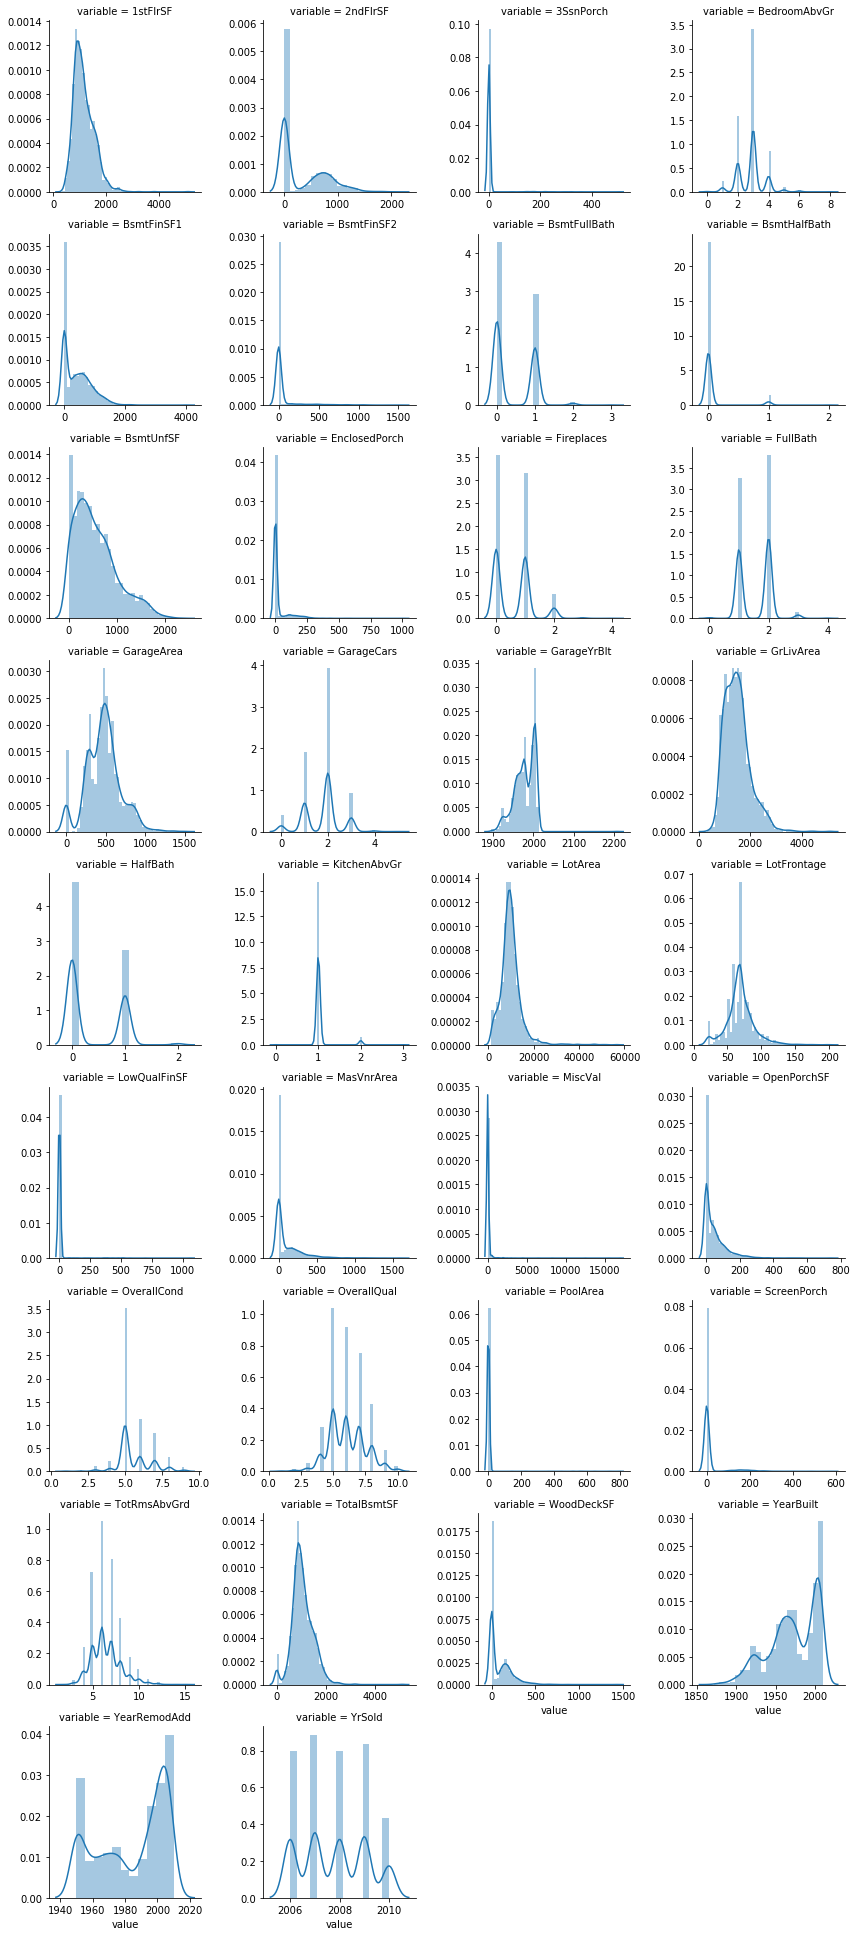

In [17]:
f = pd.melt(data[num_features_col], value_vars=sorted(num_features_col))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

### Performing log transformation

In [18]:
skewed_features = data[num_features_col].apply(lambda x: x.skew())
skewed_features = skewed_features[abs(skewed_features) > 0.75]
skewed_features = skewed_features.index

data[skewed_features] = np.log1p(data[skewed_features])


### Correlation 

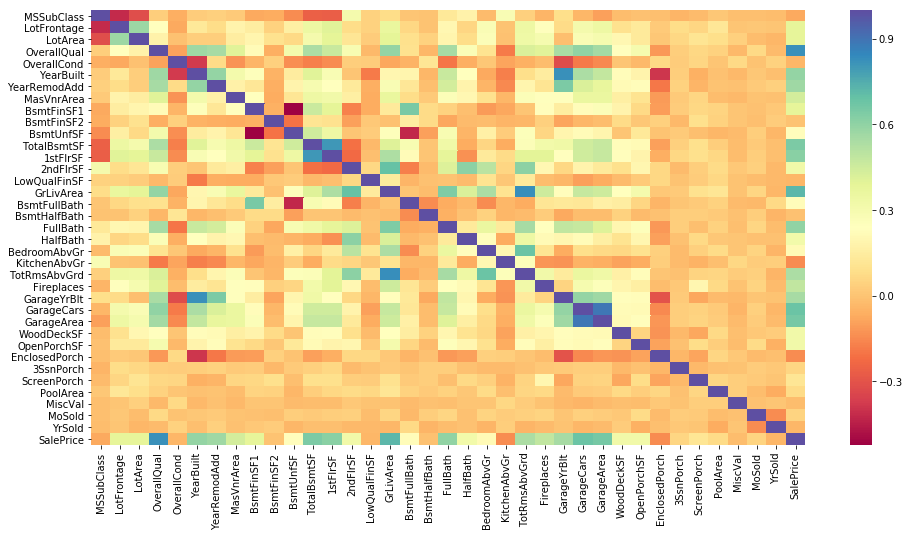

In [19]:
corr = train.corr()
sns.heatmap(corr,cmap="Spectral")

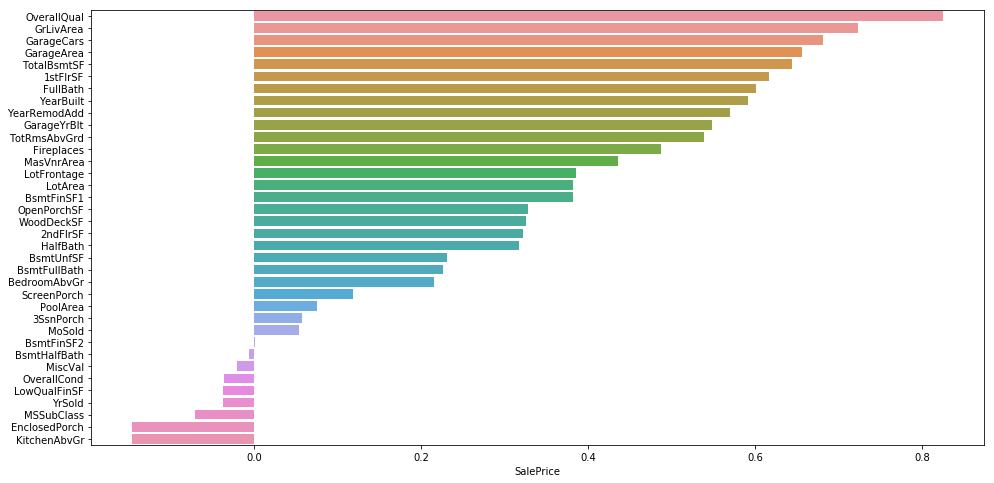

In [20]:
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')

### Getting dummy variables 

In [21]:
data = pd.get_dummies(data, drop_first=True)

In [22]:
data.shape

(2906, 259)

## Modeling

### Preparing train and test data

In [23]:
train = data[:train.shape[0]].values
test = data[train.shape[0]:].values

In [24]:
train.shape,test.shape,y.shape

((1447, 259), (1459, 259), (1447, 1))

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train,y,test_size=0.2)

### Training our model

In [26]:
from linear_regression import LinearRegression
cls = LinearRegression(diff=10000)
t=cls.fit(x_train,y_train,learning_rate=0.000008,itration=200000,batch_size=16)

learning_rate :  8e-06  itration :  200000  batch_size :  16
Start error : 72.22642061025157
itration :  0  error :  0.0480085982017796
itration :  10000  error :  0.03232250941828946
itration :  20000  error :  0.0278257266543004
itration :  30000  error :  0.024460246909846994
itration :  40000  error :  0.021900561923042336
itration :  50000  error :  0.019938063602827075
itration :  60000  error :  0.018402702387197774
itration :  70000  error :  0.017172238129928446
itration :  80000  error :  0.016163787703185738
itration :  90000  error :  0.01532158079246097
itration :  100000  error :  0.014607402641402489
itration :  110000  error :  0.013994293047033587
itration :  120000  error :  0.013462621773915922
itration :  130000  error :  0.012997669211608907
itration :  140000  error :  0.012588114622141922
itration :  150000  error :  0.012225066342459344
itration :  160000  error :  0.01190141941170223
itration :  170000  error :  0.01161141583895532
itration :  180000  error :  

In [27]:
y_pred1 = cls.predict(x_test,t)

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)
y_pred2=reg.predict(x_test)

In [29]:
y_pred2 = np.expm1(y_pred2)
y_pred1 = np.expm1(y_pred1) 

In [30]:
from sklearn.metrics import mean_squared_error
error2 = mean_squared_error(y_pred2,y_test)
error1 = mean_squared_error(y_pred1,y_test)
print("Sklearn model error :",error2)
print("Our model error :",error1)

Sklearn model error : 39589016321.214035
Our model error : 32593473705.03169


In [31]:
y_pred1 = reg.predict(test)

In [32]:
y_pred2 = cls.predict(test,t)

In [33]:
y_pred1 = np.expm1(y_pred1) 
y_pred2 = np.expm1(y_pred2)


In [34]:
sol_sklearn = pd.DataFrame({"Id":[int(i) for i in ID],"SalePrice":[float(i) for i in y_pred1 ]})
sol_my = pd.DataFrame({"Id":[int(i) for i in ID],"SalePrice":[float(i) for i in y_pred2 ]})
sol_sklearn.to_csv("sol_sklearn.csv",index=False)
sol_my.to_csv("sol_my.csv",index=False)